In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.fftpack import fft

# Question 1 - Fourier Analysis

Couldn't quite get this to work

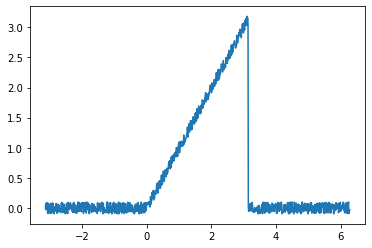

In [2]:
N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
plt.plot(t,y)

Nyquist frequency = 53.05 Hz.


(-0.1, 1.5)

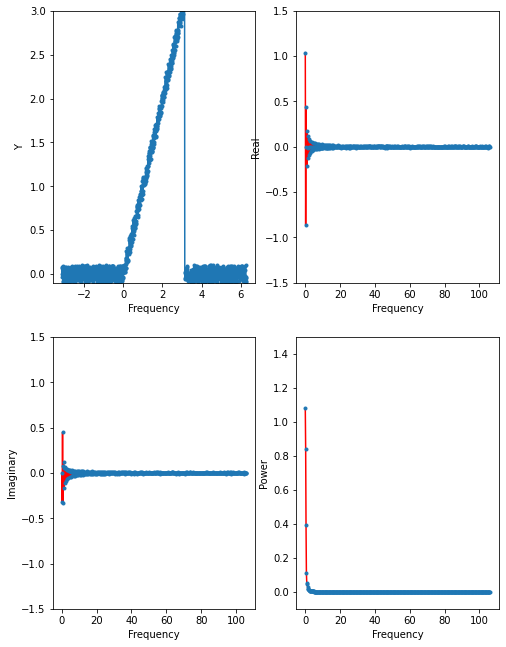

In [3]:
T=t_high-t_low

tpT=2.0*np.pi/T

N_terms = int(N_samples/2)
dt = T/N_samples

epsilon=0.000001

ytReal=np.zeros(N_terms)
ytImag=np.zeros(N_terms)
power=np.zeros(N_terms)

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n]=ytReal[n]+2.0/T*y[i]*np.cos(tpT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(tpT*n*i*dt)*dt
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
integral=0.0
N_real=int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
    


#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

time=np.zeros(1000)
ylow=np.zeros(1000)
yhigh=np.zeros(1000)

f_s = 0.2

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))
    
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

f = np.zeros(N_terms)

for i in range(N_terms):
    f[i] = i/(N_terms*dt)

fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-0.1,3)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-0.1,1.5)    

(-1.5, 3.5)

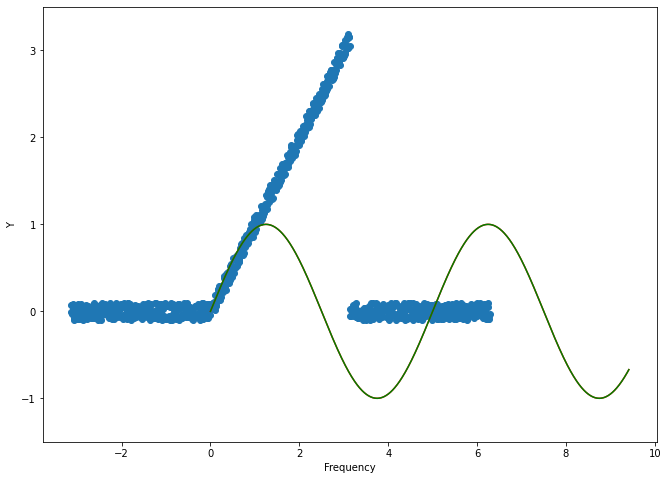

In [4]:
fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(11,8))

axs3.plot(t,y,'o')
axs3.plot(time,yhigh,'r-')
axs3.plot(time,ylow,'g-')
axs3.set_ylabel('Y')
axs3.set_xlabel('Frequency')
axs3.set_ylim(-1.5,3.5)

# Question 2 - Frogs and Lily Pads

In [5]:
def num_jumps(npads):
    
    lillies=np.arange(0,npads+1,1)
    
    bank0=0
    bank1=npads
    
    reachedbank=False
    njumps=0
    
    while reachedbank==False:
        jump=int(random.uniform(0, bank1+1))
        
        if(jump==bank1):
            reachedbank=True
        
        njumps=njumps+1
        
    return njumps

Text(0.5, 1.0, 'Average Number of Jumps')

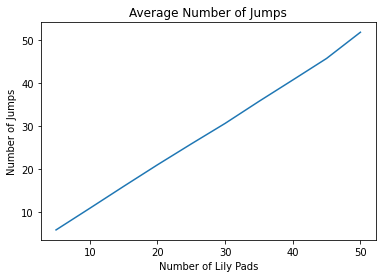

In [6]:
padmin=5
padmax=50
padinc=5

xbase=np.arange(padmin,padmax+1,padinc)
ybase=np.zeros(len(xbase))

for i in range(len(xbase)):
    dist=np.zeros(10000)
    for j in range(len(dist)):
        dist[j]=num_jumps(xbase[i])
    ybase[i]=np.mean(dist)

plt.plot(xbase, ybase)
plt.xlabel("Number of Lily Pads")
plt.ylabel("Number of Jumps")
plt.title("Average Number of Jumps")

This result shows a linear relationship between the number of pads and the number of jumps required, with a slope of nearly 1. This makes sense because the probability of reaching the other bank with any given jump scales with 1 over the number of pads.

Text(0, 0.5, 'Number of Jumps')

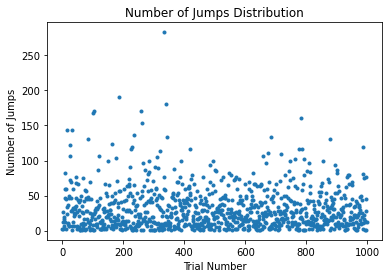

In [7]:
ntrials=np.arange(0,1000,1)
njumps=[]

for n in ntrials:
    njumps.append(num_jumps(30))

plt.plot(ntrials,njumps,".")
plt.title("Number of Jumps Distribution")
plt.xlabel("Trial Number")
plt.ylabel("Number of Jumps")

# Question 3 - Random Walk

In [8]:
def walkn(nsteps):
    
    r=stats.poisson.rvs(1, size=nsteps)
    
    distance=0
    
    for i in range(len(r)):
        direction=int(random.uniform(0,2))*2-1
        distance=distance+direction*r[i]
        
    return distance
        
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

n, bins, patches = plt.hist(xvec,bins=20,density=True)

nsteps = 1000 # number of steps
npart = 10000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)

plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

mygaus = stats.norm(0.0, np.sqrt(2*nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

NameError: name 'xvec' is not defined

The poisson distribution closely fits the theoretical gaussian distribution, both agreeing with the central limit theorem